
*   **Nama**: Muhammad Fathurrahman
*   **Email**: fatursrahman@gmail.com
*   **Tentang Project**: Klasifikasi gambar gunting, kertas batu menggunakan model CNN
*   **Notes**: Untuk melihat hasilnya, notebook harus di re-run. namun waktu pelatihan model dapat berbeda dari original (bergantung pada kemampuan PC/Laptop kalian)


In [ ]:
#Check Tensorflow Version
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
#Download rock paper scissors datasets and import to tmp path
!gdown --id 1V9q6LH_GckOWAU85HdK1BxuEpak1YHfU\

Downloading...
From: https://drive.google.com/uc?id=1V9q6LH_GckOWAU85HdK1BxuEpak1YHfU
To: /content/rockpaperscissors.zip
100% 323M/323M [00:03<00:00, 105MB/s]


In [ ]:
#Move files to tmp (To be deleted after closing this google colab in some time)
!mv "/content/rockpaperscissors.zip" "/tmp"

In [ ]:
#Unzip datasets
import os
import zipfile

data_rps = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(data_rps, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
#Create directory of rps datasets and check total images (we will be using datasets from rps-cv-images)
ds_dir = '/tmp/rockpaperscissors/rps-cv-images'
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 726
total training paper images: 712
total training scissors images: 750


In [ ]:
  #Creating model for machine learning
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

#Setting the training and validation set

train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      vertical_flip=True,
      fill_mode='nearest',
      brightness_range=[0.4,1.5],
      validation_split=0.4
      )

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.4
    )

train_generator = train_datagen.flow_from_directory(
	ds_dir,
	target_size=(150,150),
  seed=531,
	class_mode='categorical',
  batch_size=64,
  subset='training',
  shuffle=True,
)

validation_generator = validation_datagen.flow_from_directory(
	ds_dir,
	target_size=(150,150),
  seed=135,
	class_mode='categorical',
  batch_size=64,
  subset='validation',
  shuffle=True,
)

#CNN Model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.summary()

In [ ]:
#Train your model!!!
best_model = tf.keras.callbacks.ModelCheckpoint(
    "vgg16_1.h5", 
    monitor='val_accuracy', 
    mode='max',
    verbose=1, 
    save_best_only=True
    )

callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0, 
    patience=5
    )

model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        epsilon=1e-07),
    loss = 'categorical_crossentropy', 
    metrics=['accuracy']
    )

history = model.fit(
    train_generator, 
    epochs=12, 
    validation_data = validation_generator, 
    callbacks=[best_model,callback],
    verbose=1, 
    validation_steps=3
    )


Epoch 1/8
21/21 [==============================] - ETA: 0s - loss: 0.3327 - accuracy: 0.8691
Epoch 00001: val_accuracy improved from -inf to 0.93229, saving model to vgg16_1.h5
21/21 [==============================] - 89s 4s/step - loss: 0.3327 - accuracy: 0.8691 - val_loss: 0.1731 - val_accuracy: 0.9323
Epoch 2/8
21/21 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9110
Epoch 00002: val_accuracy improved from 0.93229 to 0.97396, saving model to vgg16_1.h5
21/21 [==============================] - 86s 4s/step - loss: 0.2721 - accuracy: 0.9110 - val_loss: 0.0949 - val_accuracy: 0.9740
Epoch 3/8
21/21 [==============================] - ETA: 0s - loss: 0.2649 - accuracy: 0.9102
Epoch 00003: val_accuracy did not improve from 0.97396
21/21 [==============================] - 86s 4s/step - loss: 0.2649 - accuracy: 0.9102 - val_loss: 0.1006 - val_accuracy: 0.9531
Epoch 4/8
21/21 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.9186
Epoch 00004: va

14/14 [==============================] - 15s 1s/step - loss: 0.0848 - accuracy: 0.9760
Test accuracy : 0.9759725332260132
21/21 [==============================] - 26s 1s/step - loss: 0.1512 - accuracy: 0.9551
Training accuracy : 0.9550989270210266


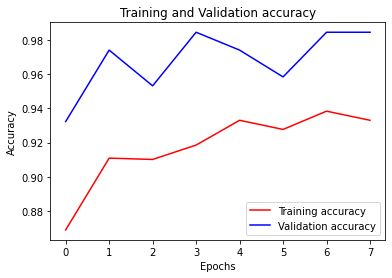

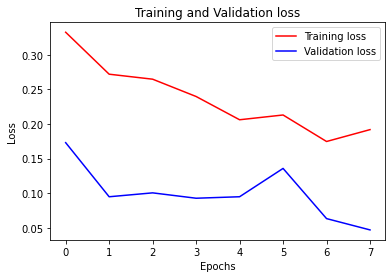

In [ ]:
#Evaluate the training model

loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy :', accuracy)
loss, accuracy = model.evaluate(train_generator)
print('Training accuracy :', accuracy)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

loss_train = history.history['loss']
loss_val = history.history['val_loss']

plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#Test your model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pandas as pd

In [ ]:
bbc = pd.read_csv(
        'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv')
bbc

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
def remove_stopwords(sentence):
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as",
                  "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could",
                  "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had",
                  "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself",
                  "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
                  "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of",
                  "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own",
                  "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that",
                  "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these",
                  "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too",
                  "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what",
                  "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why",
                  "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours",
                  "yourself", "yourselves"]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [ ]:
def parse_data_from_df(df):
    sentences = df["text"].values.tolist()
    labels = df["category"].values.tolist()
    for index in range(len(sentences)):
        sentences[index] = remove_stopwords(sentences[index])
        
    return sentences, labels

In [ ]:
sentences, labels = parse_data_from_df(bbc)

print(sentences[:5])
print(labels[:5])

['tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satel

In [ ]:
training_portion = .8
def train_val_split(sentences, labels, training_split):
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)
    
    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    return train_sentences, validation_sentences, train_labels, validation_labels

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, training_portion)

In [ ]:
tokenizer = Tokenizer(num_words=1000, oov_token="<00V>")  # YOUR CODE HERE
word_index = tokenizer.word_index

NameError: ignored

In [ ]:
import tensorflow as tf
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/cats_and_dogs.zip'
urllib.request.urlretrieve(data_url, 'cats_and_dogs.zip')
local_file = 'cats_and_dogs.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [ ]:
BASE_DIR = 'data/cats_and_dogs_filtered'
train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

In [ ]:
train_datagen = ImageDataGenerator(
    # YOUR CODE HERE
    rescale=1. / 255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# YOUR IMAGE SIZE SHOULD BE 150x150
# Make sure you used "binary"
train_generator = train_datagen.flow_from_directory(
    # YOUR CODE HERE
    directory=train_dir,
    seed=11,
    batch_size=32,
    class_mode="binary",
    target_size=(150, 150)
)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dir,
    seed=11,
    batch_size=16,
    class_mode="binary",
    target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if ((logs.get('accuracy') > 0.75) and (logs.get('val_accuracy') > 0.75)):
          print("\nReached 75% train and val accuracy so cancelling training!")
          self.model.stop_training = True

callback = myCallback()

earlystopping = [
  tf.keras.callbacks.EarlyStopping(
      # Stop training when `val_loss` is no longer improving
      monitor="val_accuracy",
      # "no longer improving" being further defined as "for at least 1 epochs"
      patience=3,
      verbose=1,
  )
]

In [ ]:
model = tf.keras.models.Sequential([
    # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator,
          epochs=30,
          verbose=1,
          validation_data=validation_generator,
          callbacks=[callback, earlystopping])

Epoch 1/30
63/63 [==============================] - 131s 2s/step - loss: 0.7436 - accuracy: 0.5410 - val_loss: 0.6631 - val_accuracy: 0.6170
Epoch 2/30
63/63 [==============================] - 130s 2s/step - loss: 0.6720 - accuracy: 0.5865 - val_loss: 0.6436 - val_accuracy: 0.6260
Epoch 3/30
63/63 [==============================] - 127s 2s/step - loss: 0.6503 - accuracy: 0.6165 - val_loss: 0.6335 - val_accuracy: 0.6400
Epoch 4/30
63/63 [==============================] - 131s 2s/step - loss: 0.6334 - accuracy: 0.6375 - val_loss: 0.6267 - val_accuracy: 0.6480
Epoch 5/30
63/63 [==============================] - 130s 2s/step - loss: 0.6310 - accuracy: 0.6405 - val_loss: 0.6183 - val_accuracy: 0.6530
Epoch 6/30
63/63 [==============================] - 128s 2s/step - loss: 0.6191 - accuracy: 0.6555 - val_loss: 0.6021 - val_accuracy: 0.6660
Epoch 7/30
63/63 [==============================] - 130s 2s/step - loss: 0.6088 - accuracy: 0.6685 - val_loss: 0.5898 - val_accuracy: 0.6700
Epoch 8/30
63

In [ ]:
import json
import tensorflow as tf
import numpy as np
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/sarcasm.json'
urllib.request.urlretrieve(data_url, 'sarcasm.json')

with open("./sarcasm.json", 'r') as f:
    sarcasm = json.load(f)

In [ ]:
def remove_stopwords(sentence):
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as",
                  "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could",
                  "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had",
                  "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself",
                  "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
                  "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of",
                  "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own",
                  "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that",
                  "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these",
                  "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too",
                  "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what",
                  "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why",
                  "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours",
                  "yourself", "yourselves"]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [ ]:
# Non-sarcastic headline
print(sarcasm[0])

# Sarcastic headline
print(sarcasm[20000])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
{'article_link': 'https://www.theonion.com/pediatricians-announce-2011-newborns-are-ugliest-babies-1819572977', 'headline': 'pediatricians announce 2011 newborns are ugliest babies in 30 years', 'is_sarcastic': 1}


In [ ]:
sentences = []
labels = []

for item in sarcasm:
    sentences.append(remove_stopwords(item['headline']))
    labels.append(item['is_sarcastic'])

In [ ]:
print(len(sentences))
print(len(labels))

26709
26709


In [ ]:
print(sentences[:5])
print(labels[:5])

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'j.k. rowling wishes snape happy birthday in the most magical way']
[0, 0, 1, 1, 0]


In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
def train_val_split(sentences, labels, training_split):

    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    training_sentences = sentences[:train_size]
    training_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    return training_sentences, validation_sentences, training_labels, validation_labels

train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, training_size)

In [ ]:
# Fit your tokenizer with training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)  # YOUR CODE HERE
tokenizer.fit_on_texts(train_sentences)
train_seq = tokenizer.texts_to_sequences(train_sentences)
train_padded_seq = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
val_seq = tokenizer.texts_to_sequences(val_sentences)
val_padded_seq = pad_sequences(val_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_labels_final = np.array(train_labels)
val_labels_final = np.array(val_labels)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy') > 0.77) and (logs.get('val_accuracy') > 0.77)):
            print("\nReached 77% train and val accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

model = tf.keras.Sequential([
    # YOUR CODE HERE. DO not change the last layer or test may fail
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:

model.fit(train_padded_seq,
          train_labels_final,
          batch_size=64,
          epochs=50,
          validation_data=(val_padded_seq, val_labels_final),
          callbacks=[callback],
          verbose=1,
          )

Epoch 1/50
418/418 [==============================] - 3s 4ms/step - loss: 0.6857 - accuracy: 0.5610
Epoch 2/50
418/418 [==============================] - 1s 3ms/step - loss: 0.6854 - accuracy: 0.5610
Epoch 3/50
418/418 [==============================] - 1s 2ms/step - loss: 0.6798 - accuracy: 0.5635
Epoch 4/50
418/418 [==============================] - 1s 2ms/step - loss: 0.6348 - accuracy: 0.6447
Epoch 5/50
205/418 [=============>................] - ETA: 0s - loss: 0.5949 - accuracy: 0.6863

KeyboardInterrupt: ignored